## Logistic Function / Sigmoid Function

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Logistic Regression

In [3]:
import pandas as pd
df = pd.read_csv("2batch_P_normal-sean.csv",encoding = "big5")
df.head()

,Lot-ID,Wafer-NO,P1_6_std,P1_6_max,P1_7_std,P1_7_max,P1_8_std,P1_8_max,P1_11_std,P1_11_min,...,P2_7_max,P2_8_std,P2_8_max,P2_11_std,P2_11_min,P2_12_std,P2_12_min,P2_15_std,P2_15_max,Yield
0,1551,3,1.240112,604,1.676486,-99,2.153222,2403,0.0,2047,...,-95,2.274893,1395,80.656406,1084,19.211097,816,2.509992,-95,1
1,1551,4,0.866025,604,2.906367,-103,2.005674,2400,0.0,2047,...,-98,1.975088,1395,83.650758,1103,21.064211,848,2.029570,-97,1
2,1551,5,0.873863,604,1.972539,-104,1.566699,2400,0.0,2047,...,-97,3.032936,1398,83.409923,1105,20.866178,832,2.310900,-98,1
3,1551,6,0.792961,604,1.614330,-106,2.378884,2403,0.0,2047,...,-91,2.006768,1395,76.508823,1095,21.007256,816,1.769484,-96,1
4,1551,8,0.948683,604,1.969207,-101,0.948683,2400,0.0,2047,...,-94,2.888742,1395,83.550386,1101,20.526288,832,2.751010,-95,1


In [4]:
df_abnormal = pd.read_csv("2batch_P_abnormal-sean.csv",encoding = "big5")
df2 = pd.concat([df_abnormal,df_abnormal,df_abnormal,df_abnormal,df_abnormal,df_abnormal,df_abnormal,df_abnormal,df_abnormal])
df2.head()

,Lot-ID,Wafer-NO,P1_6_max,P1_6_std,P1_7_max,P1_7_std,P1_8_max,P1_8_std,P1_11_min,P1_11_std,...,P2_7_std,P2_8_max,P2_8_std,P2_11_min,P2_11_std,P2_12_min,P2_12_std,P2_15_max,P2_15_std,Yield
0,1549,1,604,1.048809,-103,1.264911,2397,1.549193,2047,0.0,...,1.378023,1395,2.270173,1148,6.831403,896,3.958446,-102,1.259351,0
1,1549,2,603,0.674200,-100,1.361817,2403,2.493628,2047,0.0,...,3.486045,1398,2.847583,1104,9.077733,865,9.160613,-92,2.397104,0
2,1549,4,604,0.904534,-99,1.537412,2403,2.427120,2047,0.0,...,2.949158,1395,2.485948,1060,7.773531,822,4.476171,-78,0.634648,0
3,1549,6,604,1.164500,-98,2.490893,2400,1.732051,2047,0.0,...,2.093709,1395,2.461695,1097,6.741949,897,8.597795,-98,2.074736,0
4,1549,7,604,0.854850,-74,8.881392,2461,16.471921,2047,0.0,...,3.963880,1398,3.055404,1119,11.270674,857,11.181582,-91,1.696219,0


### 切分訓練資料與測試資料

In [5]:
from sklearn.model_selection import train_test_split
X = df[['P1_11_min','P1_12_min','P1_15_max','P2_11_min','P2_12_min','P2_15_max']]
y = df['Yield']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
y_test.head()

141    1
753    1
770    1
76     1
206    1
Name: Yield, dtype: int64

In [6]:
X2 = df2[['P1_11_min','P1_12_min','P1_15_max','P2_11_min','P2_12_min','P2_15_max']]
y2 = df2['Yield']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.2)
X2_test.count()

P1_11_min    229
P1_12_min    229
P1_15_max    229
P2_11_min    229
P2_12_min    229
P2_15_max    229
dtype: int64

In [7]:
X_abnormal = df_abnormal[['P1_11_min','P1_12_min','P1_15_max','P2_11_min','P2_12_min','P2_15_max']]
y_abnormal = df_abnormal['Yield']
X_abnormal_train, X_abnormal_test, y_abnormal_train, y_abnormal_test = train_test_split(X_abnormal,y_abnormal, test_size = 0.2)
X_abnormal_train.head()

,P1_11_min,P1_12_min,P1_15_max,P2_11_min,P2_12_min,P2_15_max
63,2047,435,-18,1104,861,-88
15,2047,421,-27,1098,842,-96
67,2017,408,-17,1145,888,-102
79,2047,886,-20,936,730,-55
14,2047,774,-30,1068,873,-98


In [8]:
X3_train = pd.concat([X_train, X2_train])
X3_test = pd.concat([X_test, X_abnormal_test])
y3_train = pd.concat([y_train, y2_train])
y3_test = pd.concat([y_test, y_abnormal_test])

### 標準化（Normalize）參數值

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X3_train)
X3_train_nor = sc.transform(X3_train)
X3_test_nor = sc.transform(X3_test)
X3_train_nor[:10]

array([[ 3.31236132e-01, -6.70650296e-01,  4.73827892e-01,
         2.05041754e-04,  5.53440048e-02, -4.39147577e-01],
       [-8.38269200e-02, -6.28204937e-01,  6.76700168e-01,
         6.13342976e-01,  7.26970283e-01, -9.41656169e-01],
       [-4.94006462e+00, -1.19414307e+00,  8.79572444e-01,
        -1.74166409e+00, -1.67460247e+00,  6.66371326e-01],
       [ 3.31236132e-01, -5.78685350e-01,  7.78136306e-01,
         6.41212883e-01,  8.69436463e-01, -6.40151014e-01],
       [ 1.30211254e-02, -6.49427617e-01,  7.78136306e-01,
         6.41212883e-01,  1.00172649e+00, -5.89900155e-01],
       [-4.29712796e-01, -6.91872976e-01,  6.76700168e-01,
        -1.49083494e+00, -2.28517181e+00,  1.92264281e+00],
       [ 3.31236132e-01, -4.79646177e-01, -3.37661214e-01,
         3.62513821e-01,  5.23447168e-01,  3.14615312e-01],
       [ 2.68565604e-02, -6.35279163e-01,  8.79572444e-01,
         1.81359432e-01, -1.17597084e+00,  3.64866171e-01],
       [-4.43548231e-01, -6.56501843e-01,  7.781

### 訓練資料分類效果（使用兩個參數）

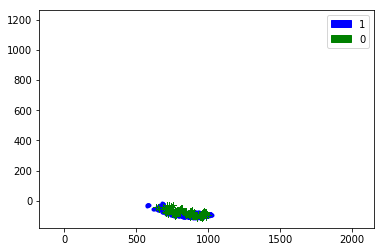

In [10]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.patches as mpatches

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X3_train_nor, y3_train)
pred_y = classifier.predict(X3_train_nor)
#print(pred_y)
#print(pred_y.shape)
for i in range(len(X3_train_nor)):
    if(classifier.predict(X3_train_nor[i].reshape(1,-1))==1):
        plt.plot(X3_train['P1_11_min'].reset_index(drop=True)[i],X3_train['P1_12_min'].reset_index(drop=True)[i],X3_train['P1_15_max'].reset_index(drop=True)[i],X3_train['P2_11_min'].reset_index(drop=True)[i],X3_train['P2_12_min'].reset_index(drop=True)[i],X3_train['P2_15_max'].reset_index(drop=True)[i],'b.')
    else:
        plt.plot(X3_train['P1_11_min'].reset_index(drop=True)[i],X3_train['P1_12_min'].reset_index(drop=True)[i],X3_train['P1_15_max'].reset_index(drop=True)[i],X3_train['P2_11_min'].reset_index(drop=True)[i],X3_train['P2_12_min'].reset_index(drop=True)[i],X3_train['P2_15_max'].reset_index(drop=True)[i],'g+')
        
# 標註（補丁patch）
blue_patch = mpatches.Patch(color='blue', label='1')
green_patch = mpatches.Patch(color='green', label='0')
plt.legend(handles=[blue_patch,green_patch], loc = 'upper right')  
plt.show()

### 分類效果測試（使用訓練好的model）

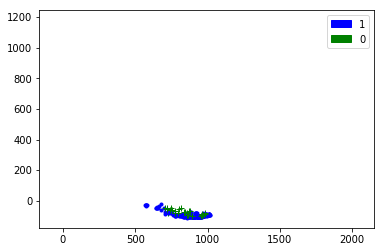

In [11]:
for i in range(len(X3_test_nor)):
    if(classifier.predict(X3_test_nor[i].reshape(1,-1))==1):
        plt.plot(X3_test['P1_11_min'].reset_index(drop=True)[i],X3_test['P1_12_min'].reset_index(drop=True)[i],X3_test['P1_15_max'].reset_index(drop=True)[i],X3_test['P2_11_min'].reset_index(drop=True)[i],X3_test['P2_12_min'].reset_index(drop=True)[i],X3_test['P2_15_max'].reset_index(drop=True)[i],'b.')
    else:
        plt.plot(X3_test['P1_11_min'].reset_index(drop=True)[i],X3_test['P1_12_min'].reset_index(drop=True)[i],X3_test['P1_15_max'].reset_index(drop=True)[i],X3_test['P2_11_min'].reset_index(drop=True)[i],X3_test['P2_12_min'].reset_index(drop=True)[i],X3_test['P2_15_max'].reset_index(drop=True)[i],'g+')
        
# 標註（補丁patch）
blue_patch = mpatches.Patch(color='blue', label='1')
green_patch = mpatches.Patch(color='green', label='0')
plt.legend(handles=[blue_patch,green_patch],loc='upper right')        
plt.show()

### 視覺化混淆矩陣函式（from sklearn官網）

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

### 機率分類判斷

### Evaluation：Confusion Metrics（混淆矩陣）

In [13]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y3_test, classifier.predict(X3_test_nor))
print (cnf_matrix)

[[ 26   0]
 [  2 212]]


Confusion matrix, without normalization
[[ 26   0]
 [  2 212]]


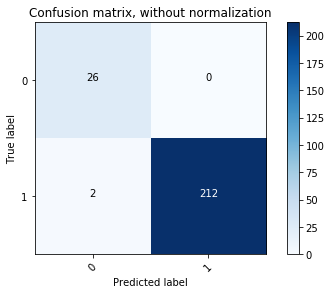

In [14]:
import itertools
target_names = ['0', '1']
plot_confusion_matrix(cnf_matrix, classes=target_names, title='Confusion matrix, without normalization')

plt.show()

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y3_test, classifier.predict(X3_test_nor), target_names=target_names))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96        26
          1       1.00      0.99      1.00       214

avg / total       0.99      0.99      0.99       240



In [16]:
print(classification_report(y3_train, classifier.predict(X3_train_nor), target_names=target_names))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       914
          1       1.00      1.00      1.00       853

avg / total       1.00      1.00      1.00      1767

